In [122]:
#
# Author : Wish MKN
#

import requests

In [79]:
url = "https://randomuser.me/api/"

#### https://randomuser.me/api/?results=300&nat=de,dk,fr,gb&inc=id,gender,name,location,email,dob,picture,nat&seed=flightright

## URL Broken down to understand it better

In [80]:
params = {'seed': 'flightright', 
          'results': 300,
          'inc': 'id,gender,name,location,email,dob,picture,nat',
          'nat':'de,dk,fr,gb'}

In [81]:
request = requests.request("GET",url, params = params)

In [82]:
request = request.json()

###### Download the request as a json file

In [83]:
import pandas as pd

###### download and normalize the results part to a data frame

In [93]:
df = pd.json_normalize(request['results'])

#### downloaded raw data as dataframe

now we can rename the colums after checking it in DF info so that we can create a like-able Database schema

#### Creating a dictornary below based on existing column names to Clean column names

can keep or change it to whatever name required in database

In [97]:
rename_dict = {
    'gender':'Gender',
    'email':'Email',
    'nat':'Nat',
    'name.title':'Title',
    'name.first' : 'First_Name',
    'name.last':'Last_Name',
    'location.street.number':'Str_Number',
    'location.street.name':'Str_Name',
    'location.city':'City',
    'location.state':'State',
    'location.country':'Country',
    'location.postcode':'Postcode',
    'location.coordinates.latitude':'Latitude',
    'location.coordinates.longitude':'Longitude',
    'location.timezone.offset':'Time_Zone_Offset',
    'location.timezone.description':'Time_Zone_Discription',
    'dob.date':'DOB',
    'dob.age':'Age',
    'id.name':'ID_Name',
    'id.value':'ID_Value',
    'picture.large':'Pic_Large',
    'picture.medium':'Pic_Medium',
    'picture.thumbnail':'Pic_Thumbnail',
}

In [98]:
df = df.rename(columns=rename_dict)

In [103]:
df.head(2)  # just to visualize our renamed columns

,Gender,Email,Nat,Title,First_Name,Last_Name,Str_Number,Str_Name,City,State,Country,Postcode,Latitude,Longitude,Time_Zone_Offset,Time_Zone_Discription,DOB,Age,ID_Name,ID_Value
0,male,florian.pierre@example.com,FR,Mr,Florian,Pierre,6120,Rue de Cuire,Saint-Denis,Haute-Saône,France,70961,39.7481,-140.8681,+3:00,"Baghdad, Riyadh, Moscow, St. Petersburg",1972-01-02T21:51:51.139Z,50,INSEE,1NNaN62534442 13
1,female,gabriele.rupprecht@example.com,DE,Miss,Gabriele,Rupprecht,80,Gartenstraße,Engen,Rheinland-Pfalz,Germany,84785,-53.4295,25.0700,+6:00,"Almaty, Dhaka, Colombo",1958-03-28T11:51:43.864Z,64,,None


In [101]:
df = df.drop(['Pic_Large', 'Pic_Medium','Pic_Thumbnail'], axis = 1)

Removed the picture columns that were above for now , 

note: we can keep that data seprately but for now removed them

##### Now exporting data generated as a dataframe to a CSV file

In [105]:
df.to_csv('Results.csv', index = False)

In [107]:
import pyodbc

##### open connection to sql odbc

In [116]:
conn = pyodbc.connect("driver={ODBC Driver 17 for SQL Server};server= MSI;UID=W_NEW; pwd=12345", autocommit = True) 

Using microsoft sql server management studio for SQL stuff.

1. Create connection to sql server management studio
2. Create a database

In [117]:
cursor = conn.cursor()

In [118]:
sq_cmd_1 = """
        CREATE DATABASE Test_1
"""

In [ ]:
cursor.execute(sq_cmd_1)

#### Test_1 Database created

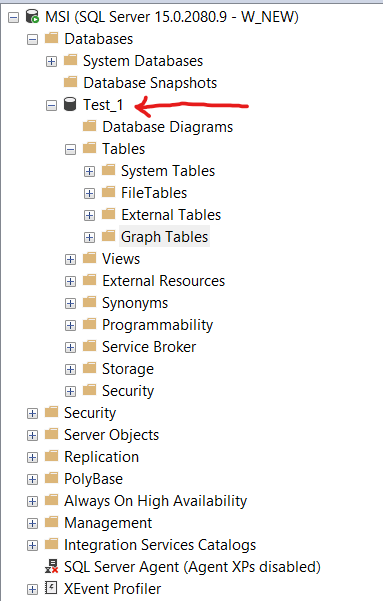



##### created a database to work forward with. 

This part below is made in a simple way and can add more things here

connecting to the sepecific database currently it is Test_1 and creating a table with our csv file generated

1. Navigating and opening connection to created database 
2. Created table with data
3. Populated table with data
4. Running simple stastic queries on table to view text output
5. Autocommit set to true , easy commits to avoid manual commit again and again
6. Give correct usr id and paswrd for sql server login else code will not run

In [121]:
conn = pyodbc.connect("driver={ODBC Driver 17 for SQL Server};server= MSI;database=Test_1;UID=W_NEW; pwd=12345", autocommit = True) 

In [123]:
cursor = conn.cursor() # overrites and now it works in the Test_1 database area

In [155]:
# Create table query 
# for now kept it as simple as possible

sq_cmd_2 = """
        CREATE TABLE flightright_data
        (
        Gender varchar(10),
        Email varchar(250),
        Nat varchar(5),
        Title varchar(10),
        First_Name varchar(250),
        Last_Name varchar(250),
        Str_Number varchar(250),
        Str_Name varchar(250),
        City varchar(250),
        State varchar(250),
        Country varchar(250),
        Postcode varchar(250),
        Latitude varchar(250),
        Longitude varchar(250),
        Time_Zone_Offset varchar(250),
        Time_Zone_Discription varchar(250),
        DOB varchar(250),
        Age varchar(10),
        ID_Name varchar(250),
        ID_Value varchar(250)
        )
"""

In [156]:
# Data insert query

sq_cmd_3 = """
        BULK INSERT flightright_data
        FROM 'C:\\Users\\Wish\\Saved Games\\Results.csv'
        WITH ( FORMAT = 'CSV' )
"""

In [157]:
cursor.execute(sq_cmd_2) # run table creation

##### Table created in Test_1 Data Base


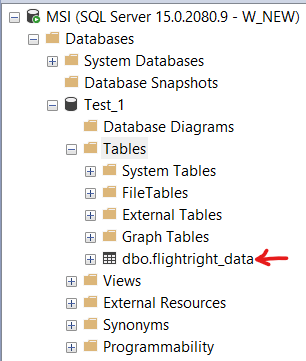

In [158]:
cursor.execute(sq_cmd_3) # run data input to table

##### data inserted into table and query execution for simple stats

In [159]:
# delete 1st row as it is just the column name again 

sq_cmd_4 = """
    DELETE FROM flightright_data
    WHERE Country = 'Country' AND Title = 'Title' AND Gender = 'Gender'
"""
cursor.execute(sq_cmd_4)

In [161]:
cursor.execute("ALTER TABLE flightright_data ALTER COLUMN Age int")  # changing column data type to get avg age

In [162]:
# get list of entries in country/ No of entries per country

cursor.execute("Select Country, COUNT(Country) AS COUNT_ENTRIES from flightright_data group by Country")
data = cursor.fetchall()

for x in data:
    print(x)

('Denmark', 64)
('France', 74)
('Germany', 82)
('United Kingdom', 80)


In [163]:
# get avg age of each country

cursor.execute("Select Country, AVG(Age) AS AVG_AGE from flightright_data group by Country")
data = cursor.fetchall()

for x in data:
    print(x)

('Denmark', 52)
('France', 50)
('Germany', 50)
('United Kingdom', 52)


In [164]:
# get count of gender

cursor.execute("Select Gender, Count(Gender) AS COUNT_GENDER from flightright_data group by Gender")
data = cursor.fetchall()

for x in data:
    print(x)

('female', 139)
('male', 161)


### above results match to what we have in data base


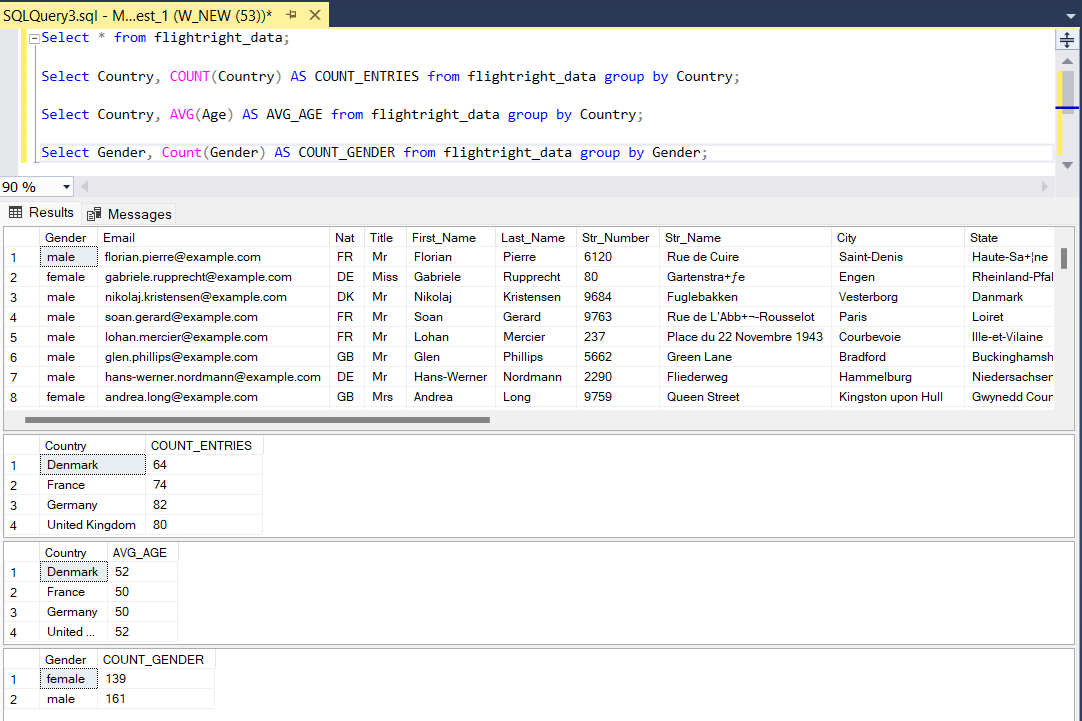